<a href="https://colab.research.google.com/github/EdivaldoVictor/Projeto-Big-Data-Python/blob/main/Eleitorado2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Eleitorado Eleições 2014**

**Importando as Bibliotecas Necessárias para o Projeto**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Criando nosso DataFrame a partir da planilha**

In [2]:
df = pd.read_csv('drive/MyDrive/PlanilhaEleições/perfil_eleitorado_2014.csv', encoding='latin1', sep=';')

**Analisando se há colunas sem valores "Nulas"**

In [3]:
df.info
df.isnull().sum()

,0
DT_GERACAO,0
HH_GERACAO,0
ANO_ELEICAO,0
SG_UF,0
CD_MUNICIPIO,0
NM_MUNICIPIO,0
CD_MUN_SIT_BIOMETRICA,0
DS_MUN_SIT_BIOMETRICA,0
NR_ZONA,0
CD_GENERO,0


In [4]:
eleitores = list(df.QT_ELEITORES_PERFIL.unique())

#**Juntando Cidades e Estados**

In [5]:
def mescla_cidade_e_estado(n):
    return n.NM_MUNICIPIO + "-" + n.SG_UF

df.NM_MUNICIPIO = df.apply(mescla_cidade_e_estado, axis=1)

In [6]:
len(df.NM_MUNICIPIO.unique())

5733

#**Eleitores por estado**

In [7]:
eleitores_por_estado = df.groupby('SG_UF')['QT_ELEITORES_PERFIL'].sum()

eleitores_por_estado = eleitores_por_estado.sort_values(ascending=False)

**Tabela**

In [8]:
eleitores_por_estado_df = pd.DataFrame({'UF': eleitores_por_estado.index, 'Eleitores': eleitores_por_estado.values})
eleitores_por_estado_df

,UF,Eleitores
0,SP,31998432
1,MG,15248681
2,RJ,12141145
3,BA,10185417
4,RS,8392033
5,PR,7865950
6,PE,6356307
7,CE,6271554
8,PA,5188450
9,SC,4859324


#**Total de Eleitores Aptos**

In [9]:
total_eleitores_df = pd.DataFrame({'Total de Eleitores Aptos': [eleitores_por_estado.sum()]})

**Tabela**

In [10]:
total_eleitores_df

,Total de Eleitores Aptos
0,142820753


**Gráfico**

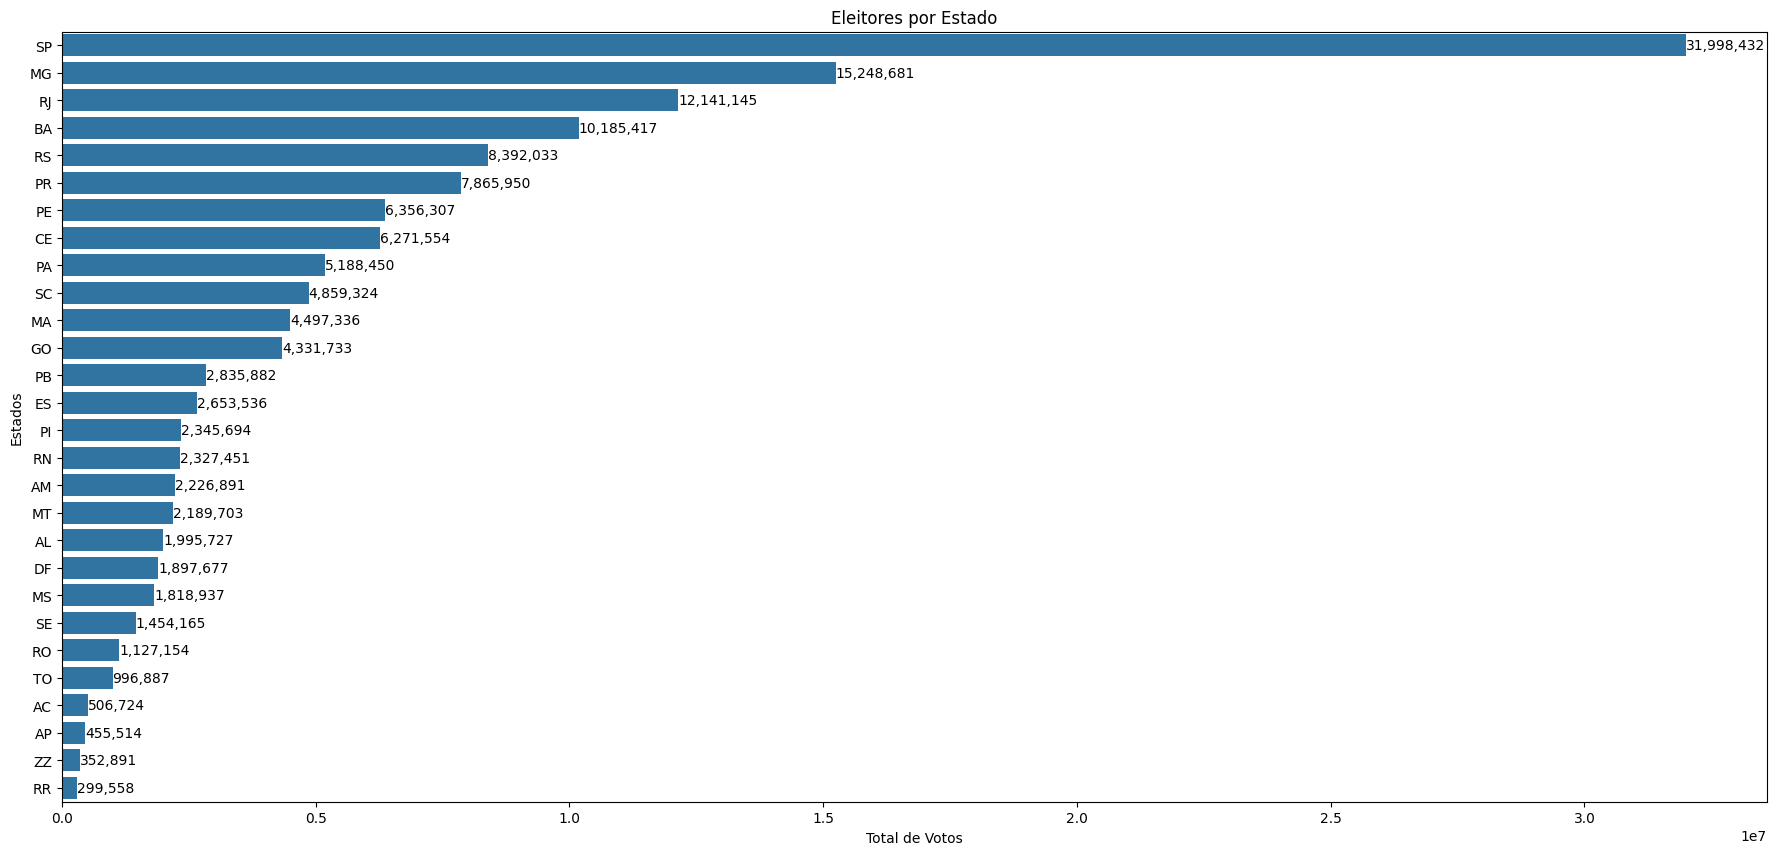

In [11]:

plt.figure(figsize=(22, 10))
sns.barplot(x=eleitores_por_estado.values, y=eleitores_por_estado.index, orient='h')
plt.xlabel('Total de Votos')
plt.ylabel('Estados')
plt.title('Eleitores por Estado')


for i, v in enumerate(eleitores_por_estado.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Eleitores Com Biometria**

In [12]:
eleitores_biometria_por_estado = df.groupby('SG_UF')['QT_ELEITORES_BIOMETRIA'].sum()
eleitores_biometria_por_estado = eleitores_biometria_por_estado.sort_values(ascending=False)
eleitores_biometria_df = pd.DataFrame({
    'UF': eleitores_biometria_por_estado.index,
    'Eleitores com Biometria': eleitores_biometria_por_estado.values
})


**Tabela**

In [13]:
eleitores_biometria_df

,UF,Eleitores com Biometria
0,SP,2408937
1,PE,2391172
2,AL,1986030
3,PR,1957992
4,DF,1895252
5,GO,1779314
6,SE,1450691
7,RN,1116495
8,RS,956911
9,PB,930403


**Gráfico**

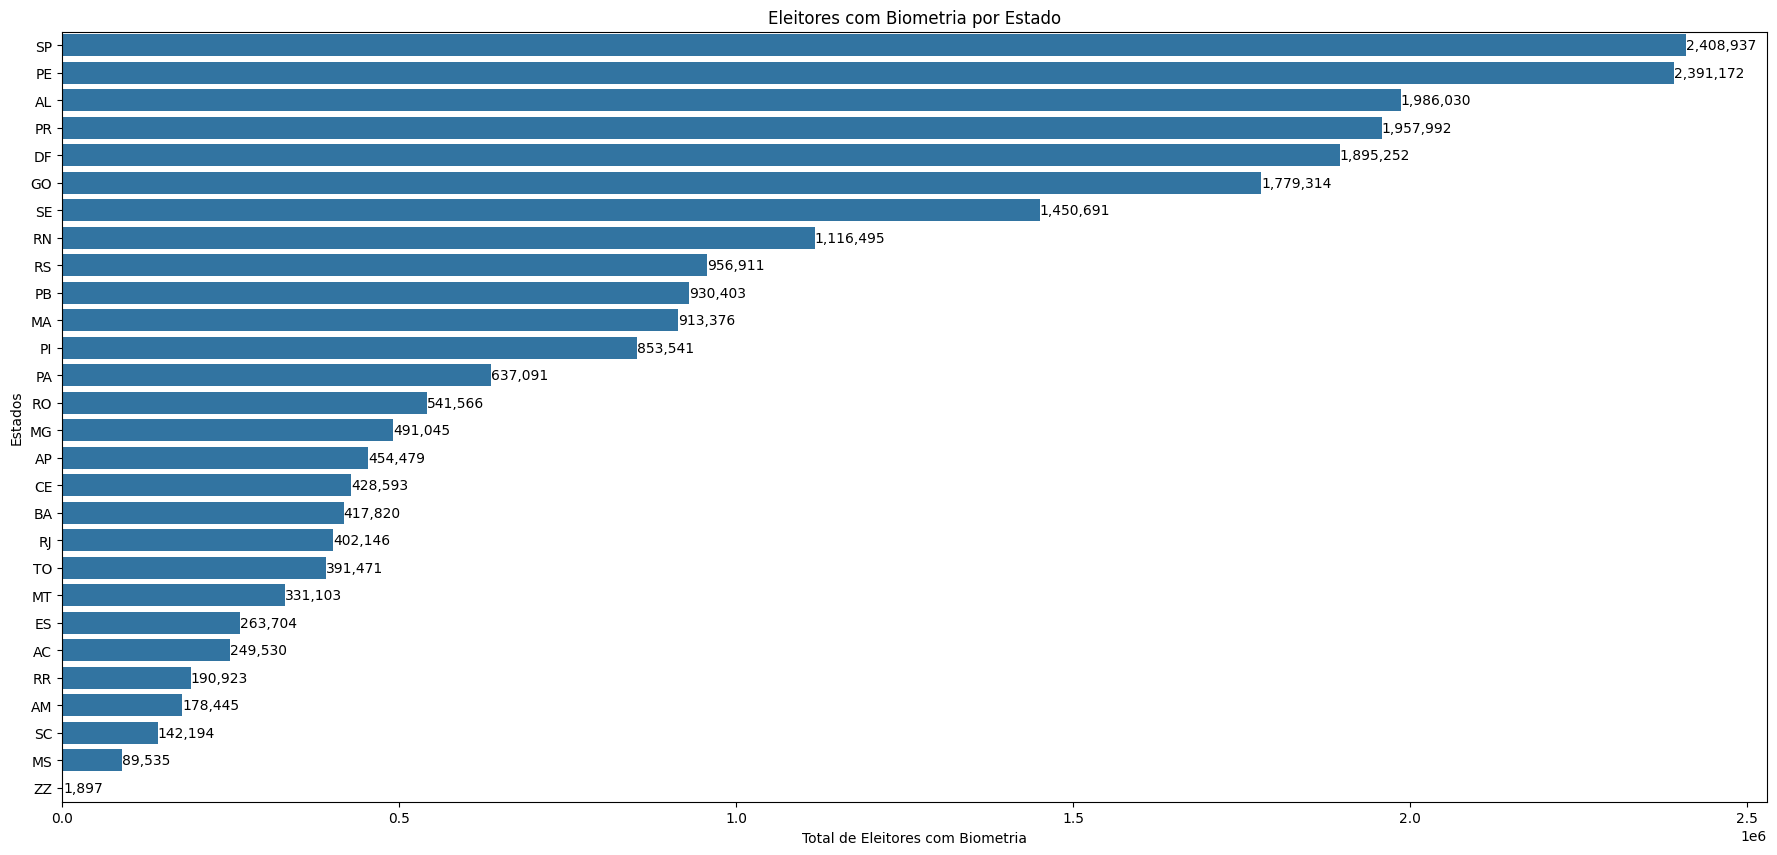

In [14]:
plt.figure(figsize=(22, 10))
sns.barplot(x='Eleitores com Biometria', y='UF', data=eleitores_biometria_df, orient='h')
plt.xlabel('Total de Eleitores com Biometria')
plt.ylabel('Estados')
plt.title('Eleitores com Biometria por Estado')

for i, v in enumerate(eleitores_biometria_df['Eleitores com Biometria']):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Eleitores Sem Biometria**

In [15]:
eleitores_sem_biometria = eleitores_por_estado - eleitores_biometria_por_estado

eleitores_sem_biometriadf = pd.DataFrame({
    'UF': eleitores_sem_biometria.index,
    'Eleitores sem Biometria': abs(eleitores_sem_biometria.values)
})

eleitores_sem_biometriadf = eleitores_sem_biometriadf.sort_values(by='Eleitores sem Biometria', ascending=False)

**Tabela**

In [16]:
eleitores_sem_biometriadf

,UF,Eleitores sem Biometria
25,SP,29589495
10,MG,14757636
18,RJ,11738999
4,BA,9767597
22,RS,7435122
17,PR,5907958
5,CE,5842961
23,SC,4717130
13,PA,4551359
15,PE,3965135


**Gráfico**

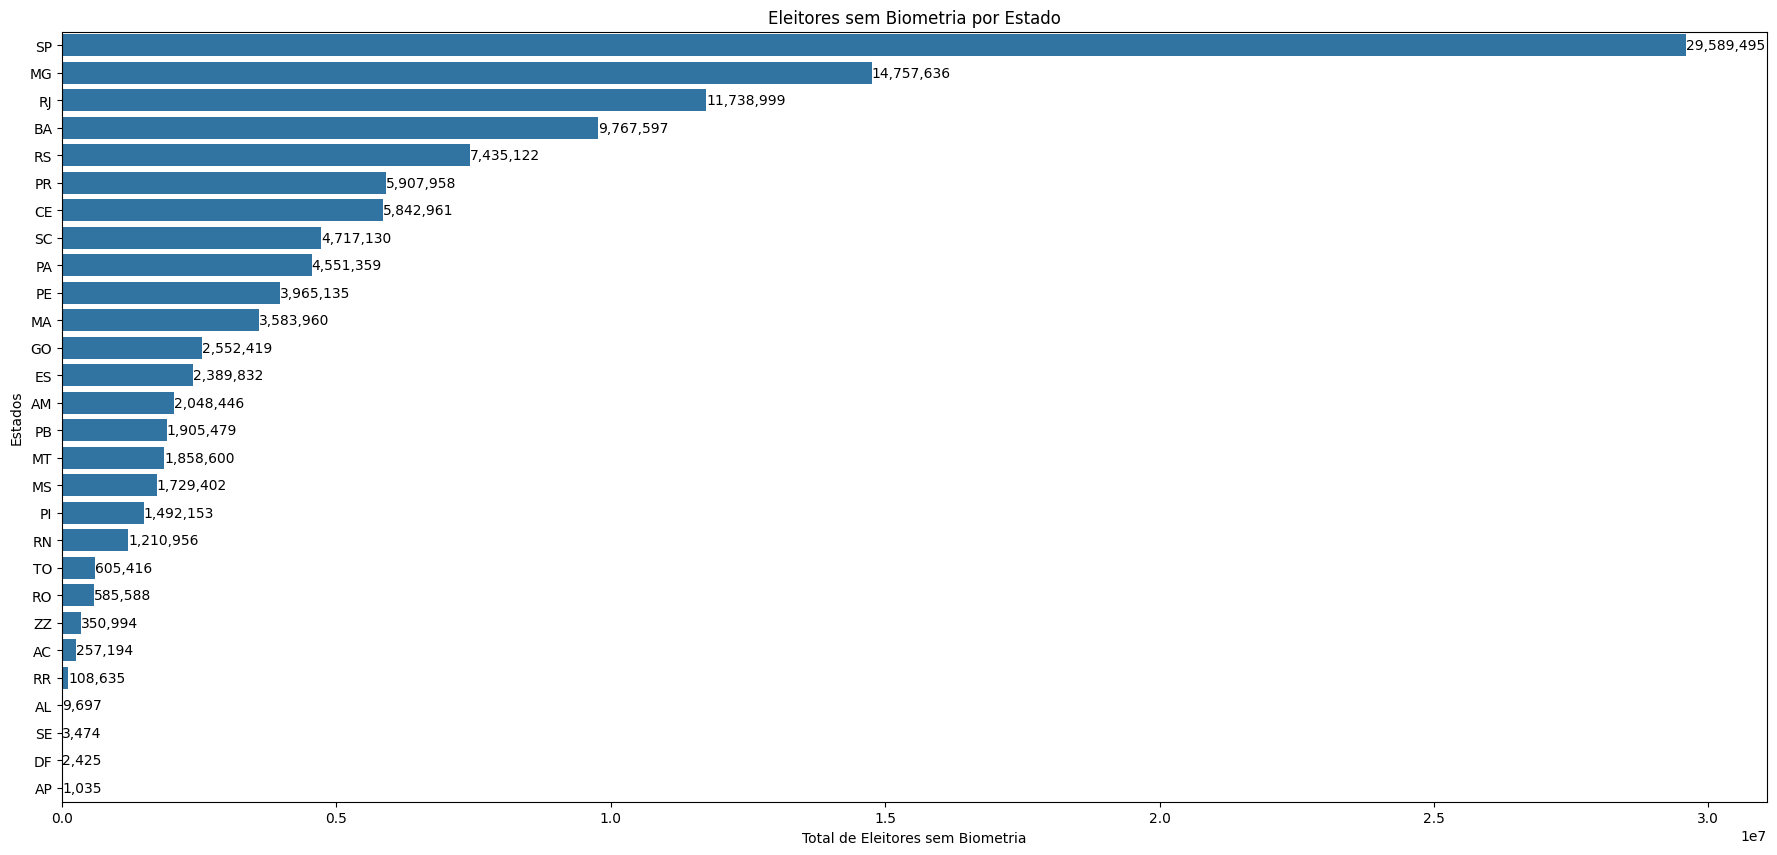

In [17]:
plt.figure(figsize=(22, 10))
sns.barplot(x='Eleitores sem Biometria', y='UF', data=eleitores_sem_biometriadf, orient='h')
plt.xlabel('Total de Eleitores sem Biometria')
plt.ylabel('Estados')
plt.title('Eleitores sem Biometria por Estado')

for i, v in enumerate(eleitores_sem_biometriadf['Eleitores sem Biometria']):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Comparando os Eleitores com e sem Biometria**

In [18]:
total_sem_biometria = eleitores_sem_biometriadf['Eleitores sem Biometria'].sum()
total_com_biometria = eleitores_biometria_df['Eleitores com Biometria'].sum()
total_eleitores = total_sem_biometria + total_com_biometria



percent_sem_biometria = (total_sem_biometria / total_eleitores) * 100
percent_com_biometria = (total_com_biometria / total_eleitores) * 100


**Tabela**

In [19]:
biometriasComp = {'Total sem Biometria': [total_sem_biometria],
        'Total com Biometria': [total_com_biometria],
        'Porcentagem sem Biometria': [f'{percent_sem_biometria:.2f}%'],
        'Porcentagem com Biometria': [f'{percent_com_biometria:.2f}%']}
biometriaSC = pd.DataFrame(biometriasComp)
biometriaSC

,Total sem Biometria,Total com Biometria,Porcentagem sem Biometria,Porcentagem com Biometria
0,118969097,23851656,83.30%,16.70%


**Gráfico**

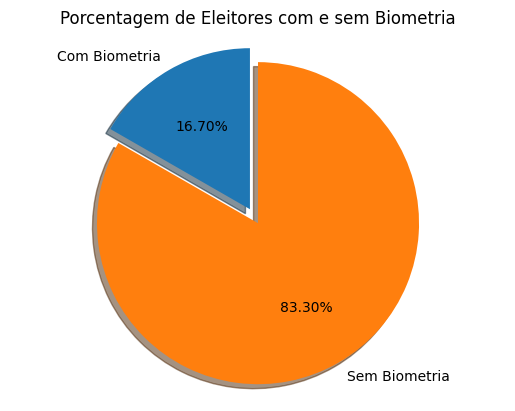

In [20]:
labels = ['Com Biometria', 'Sem Biometria']
sizes = [percent_com_biometria, percent_sem_biometria]
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax.axis('equal')

plt.title('Porcentagem de Eleitores com e sem Biometria')
plt.show()

#**Eleitores Com Deficiência**

In [21]:
eleitores_deficiencia_por_estado = df.groupby('SG_UF')['QT_ELEITORES_DEFICIENCIA'].sum()
eleitores_deficiencia_por_estado = eleitores_deficiencia_por_estado.sort_values(ascending=False)
eleitores_deficiencia_df = pd.DataFrame({
    'UF': eleitores_deficiencia_por_estado.index,
    'QT_ELEITORES_DEFICIENCIA': eleitores_deficiencia_por_estado.values
})



**Tabela**

In [22]:
eleitores_deficiencia_df

,UF,QT_ELEITORES_DEFICIENCIA
0,SP,135088
1,RJ,40548
2,PR,40065
3,MG,20509
4,RN,18341
5,PE,16312
6,CE,16011
7,RS,14976
8,BA,13569
9,GO,11851


**Total de Eleitores Com Deficiência**

In [23]:
total_eleitores_deficiencia_df = pd.DataFrame({
    'Total de Eleitores com Deficiência': [eleitores_deficiencia_por_estado.sum()]
})
total_eleitores_deficiencia_df

,Total de Eleitores com Deficiência
0,426524


**Gráfico**

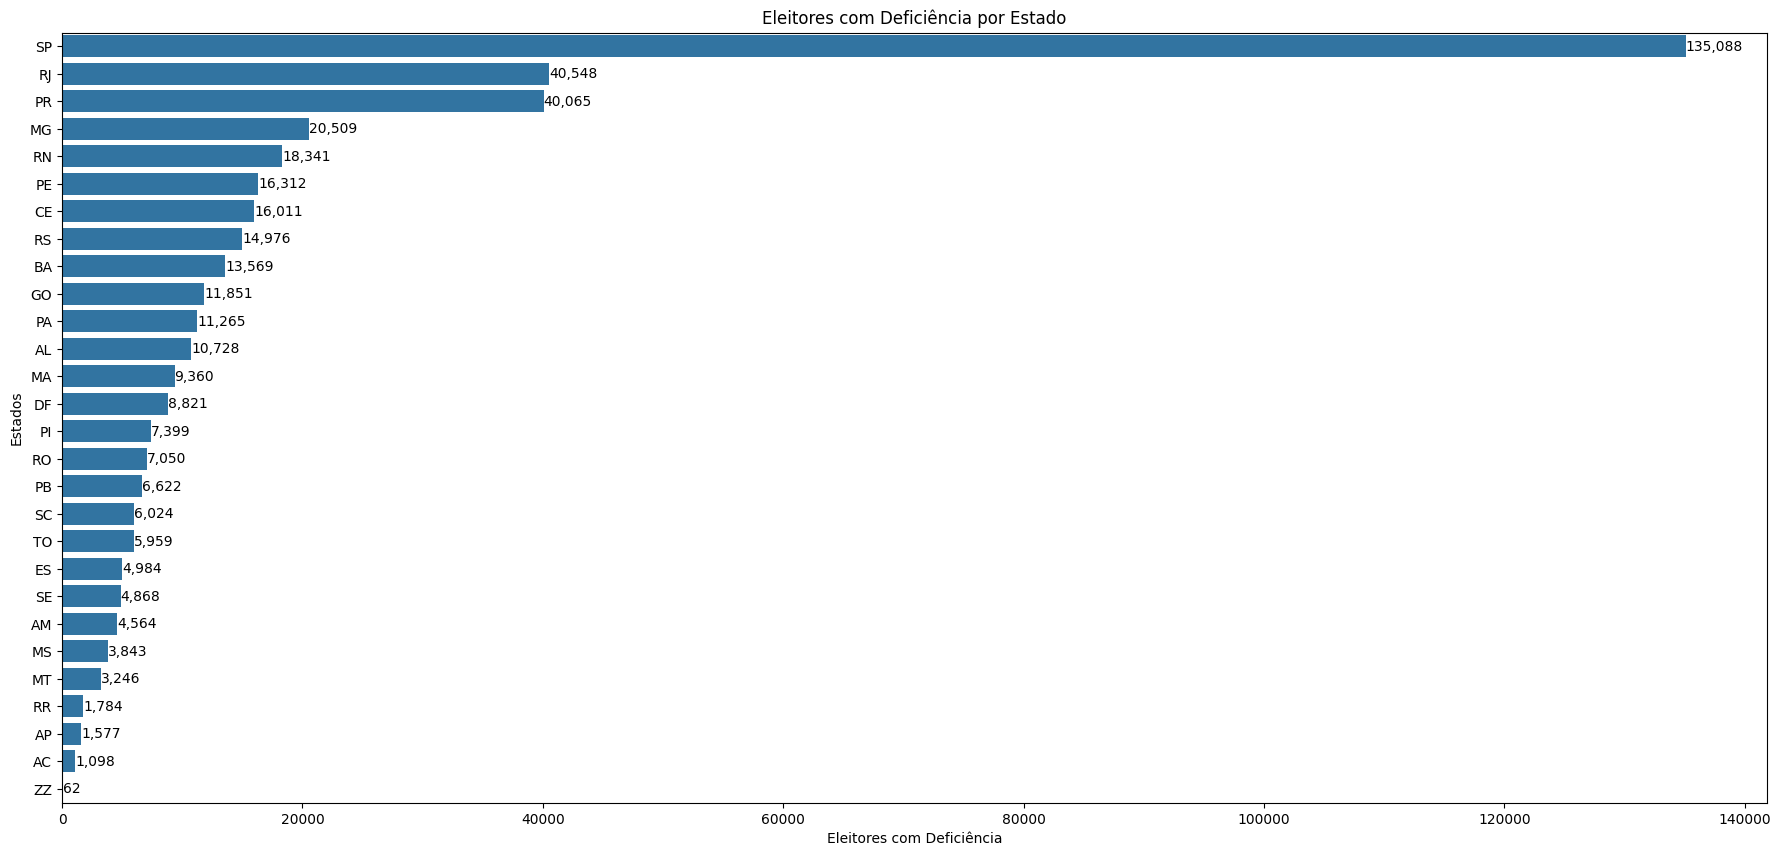

In [24]:
plt.figure(figsize=(22, 10))
sns.barplot(x='QT_ELEITORES_DEFICIENCIA', y='UF', data=eleitores_deficiencia_df, orient='h')
plt.xlabel('Eleitores com Deficiência')
plt.ylabel('Estados')
plt.title('Eleitores com Deficiência por Estado')

for i, v in enumerate(eleitores_deficiencia_df['QT_ELEITORES_DEFICIENCIA']):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Gênero dos Eleitores**

In [25]:
genero_eleitores_por_estado = df.groupby(['SG_UF', 'DS_GENERO'])['QT_ELEITORES_PERFIL'].sum().unstack()
genero_eleitores_por_estado = genero_eleitores_por_estado.fillna(0)
genero_eleitores_por_estado['Total'] = genero_eleitores_por_estado.sum(axis=1)
for genero in ['FEMININO', 'MASCULINO']:
    genero_eleitores_por_estado[genero + ' (%)'] = (genero_eleitores_por_estado[genero] / genero_eleitores_por_estado['Total']) * 100

genero_eleitores_por_estado = genero_eleitores_por_estado.round(1)


**Tabela**

In [26]:
genero_eleitores_por_estado

DS_GENERO,FEMININO,MASCULINO,NÃO INFORMADO,Total,FEMININO (%),MASCULINO (%)
SG_UF,,,,,,
AC,258233.0,248485.0,6.0,506724.0,51.0,49.0
AL,1069126.0,926601.0,0.0,1995727.0,53.6,46.4
AM,1131421.0,1095197.0,273.0,2226891.0,50.8,49.2
AP,233106.0,222408.0,0.0,455514.0,51.2,48.8
BA,5304570.0,4874046.0,6801.0,10185417.0,52.1,47.9
CE,3287941.0,2976857.0,6756.0,6271554.0,52.4,47.5
DF,1030888.0,866789.0,0.0,1897677.0,54.3,45.7
ES,1374381.0,1277091.0,2064.0,2653536.0,51.8,48.1
GO,2247865.0,2083478.0,390.0,4331733.0,51.9,48.1


**Gráfico**

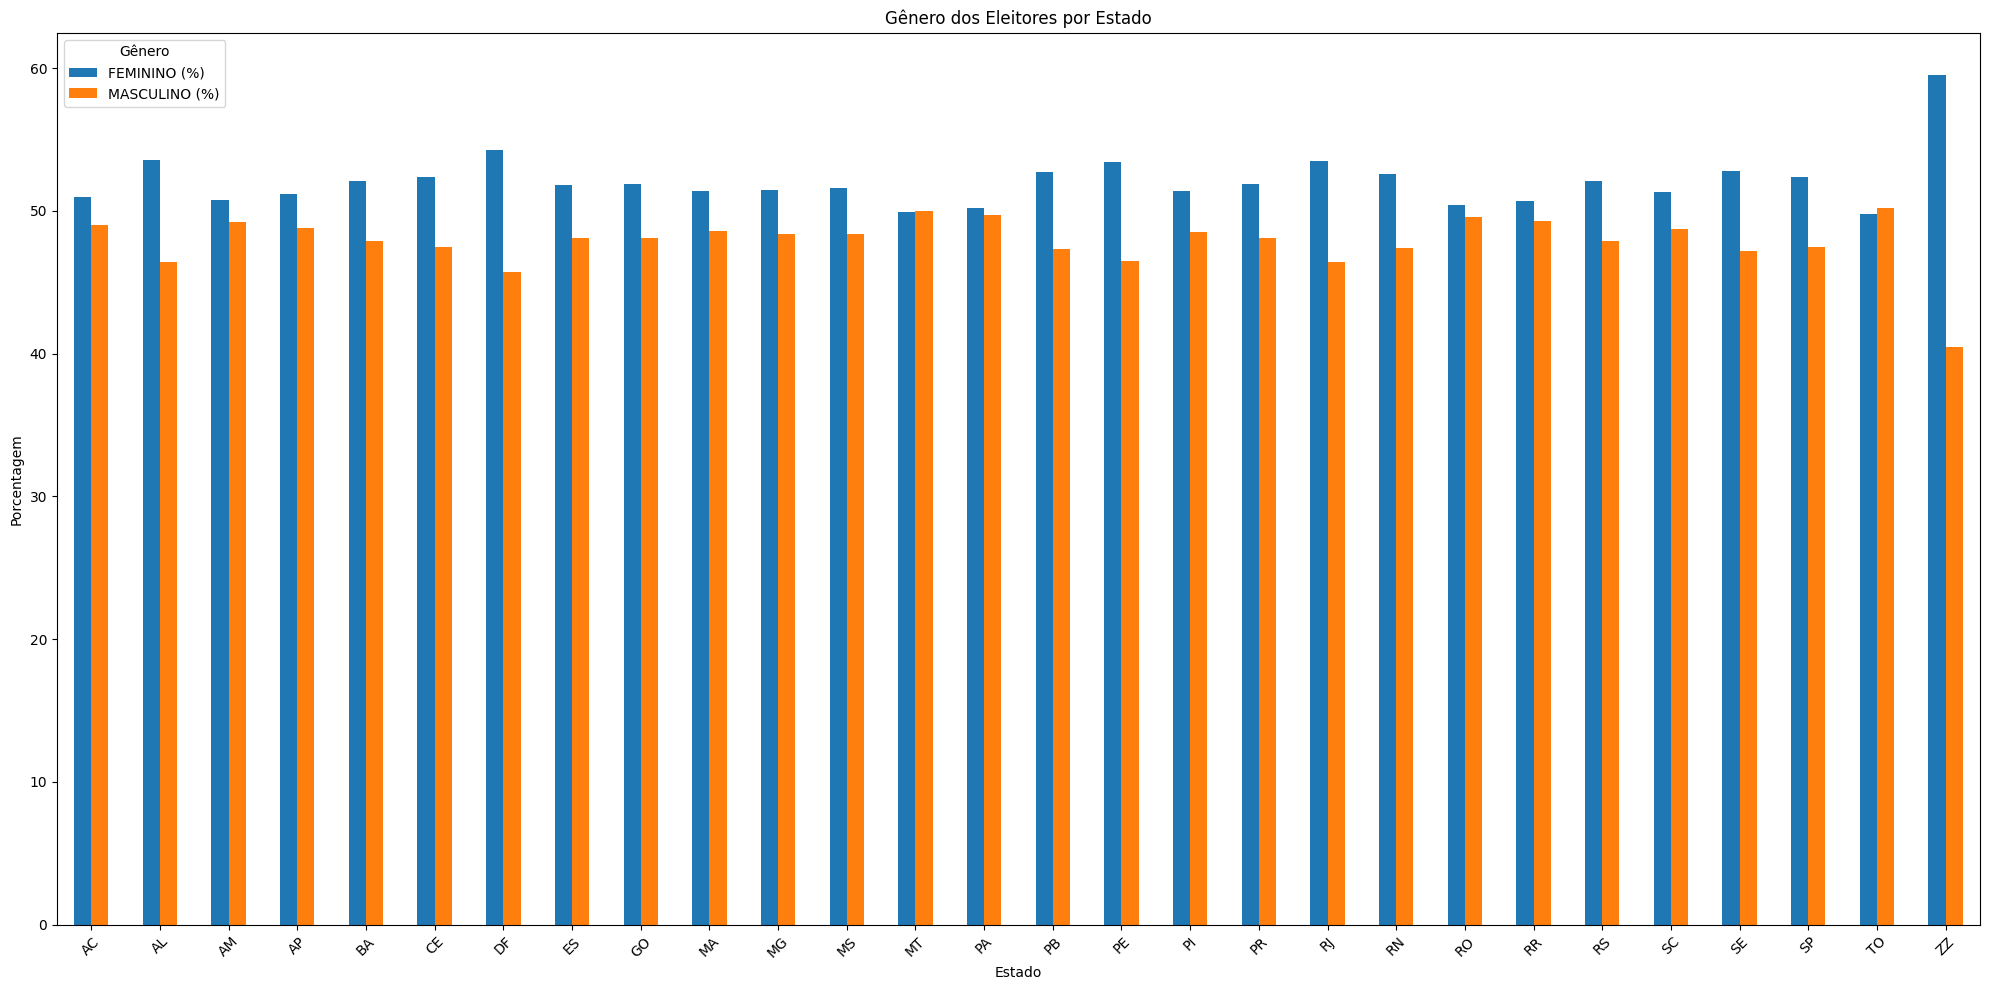

In [27]:

percentagem_colunas = [col for col in genero_eleitores_por_estado.columns if '%' in col]
plot_data = genero_eleitores_por_estado[percentagem_colunas].sort_index()

plot_data.plot(kind='bar', figsize=(20, 10))
plt.xlabel("Estado")
plt.ylabel("Porcentagem")
plt.title("Gênero dos Eleitores por Estado")
plt.xticks(rotation=45)
plt.legend(title="Gênero")

plt.tight_layout()
plt.show()

**Tabela Total gênero**

In [28]:
contagem_genero = df[df['DS_GENERO'] != 'Não Informado'].groupby('DS_GENERO')['QT_ELEITORES_PERFIL'].sum()
Total_de_EleitoresGen = contagem_genero.sum()
Porcentagem_Genero = (contagem_genero / Total_de_EleitoresGen) * 100
Tabela_Genero = pd.DataFrame({'Total': contagem_genero, 'Percentagem': Porcentagem_Genero.round(2)})

In [29]:
Tabela_Genero

,Total,Percentagem
DS_GENERO,,
FEMININO,74458640,52.13
MASCULINO,68247089,47.79
NÃO INFORMADO,115024,0.08


**Gráfico**

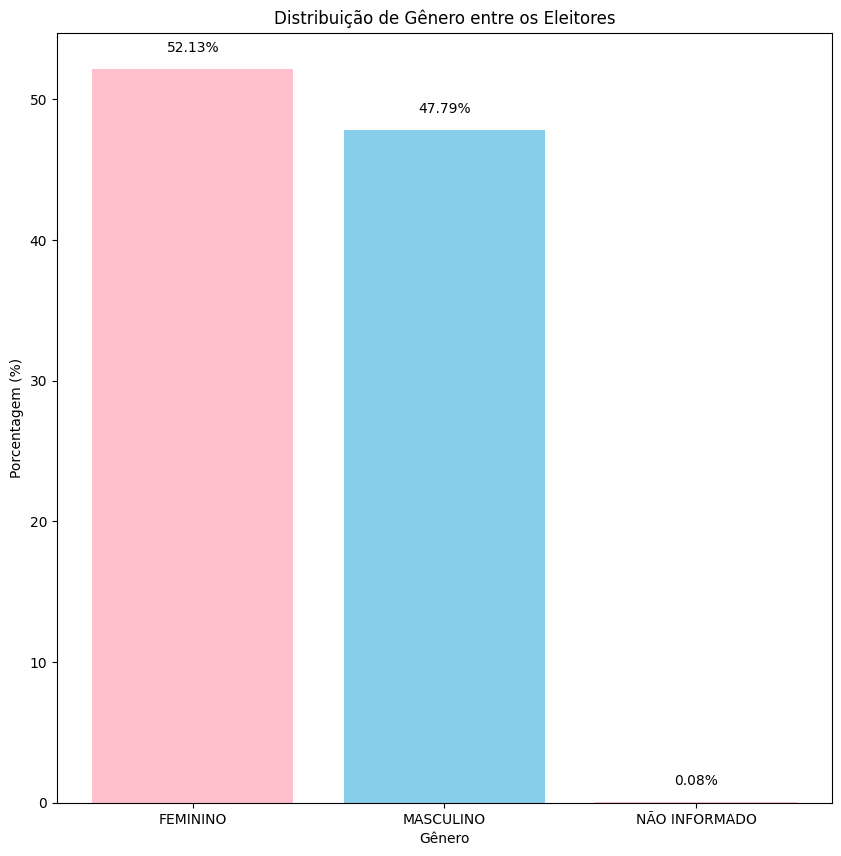

In [30]:
plt.figure(figsize=(10, 10))
plt.bar(Tabela_Genero.index, Tabela_Genero['Percentagem'], color=['pink', 'skyblue'])
plt.xlabel("Gênero")
plt.ylabel("Porcentagem (%)")
plt.title("Distribuição de Gênero entre os Eleitores")

for i, v in enumerate(Tabela_Genero['Percentagem']):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

#**Faixa Etária do Eleitores**

In [31]:
faixa_etaria_eleitores = df.groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()

faixa_etaria_eleitores = faixa_etaria_eleitores.sort_values(ascending=False)

faixa_etaria_df = pd.DataFrame({'Faixa Etária': faixa_etaria_eleitores.index,
                               'Total de Eleitores': faixa_etaria_eleitores.values})

**Tabela**

In [32]:
faixa_etaria_df

,Faixa Etária,Total de Eleitores
0,30 a 34 anos,16742026
1,25 a 29 anos,16526346
2,35 a 39 anos,15044868
3,40 a 44 anos,13370639
4,45 a 49 anos,12660624
5,21 a 24 anos,12604211
6,50 a 54 anos,11498717
7,55 a 59 anos,9631223
8,60 a 64 anos,7761442
9,65 a 69 anos,5710806


**gráfico**

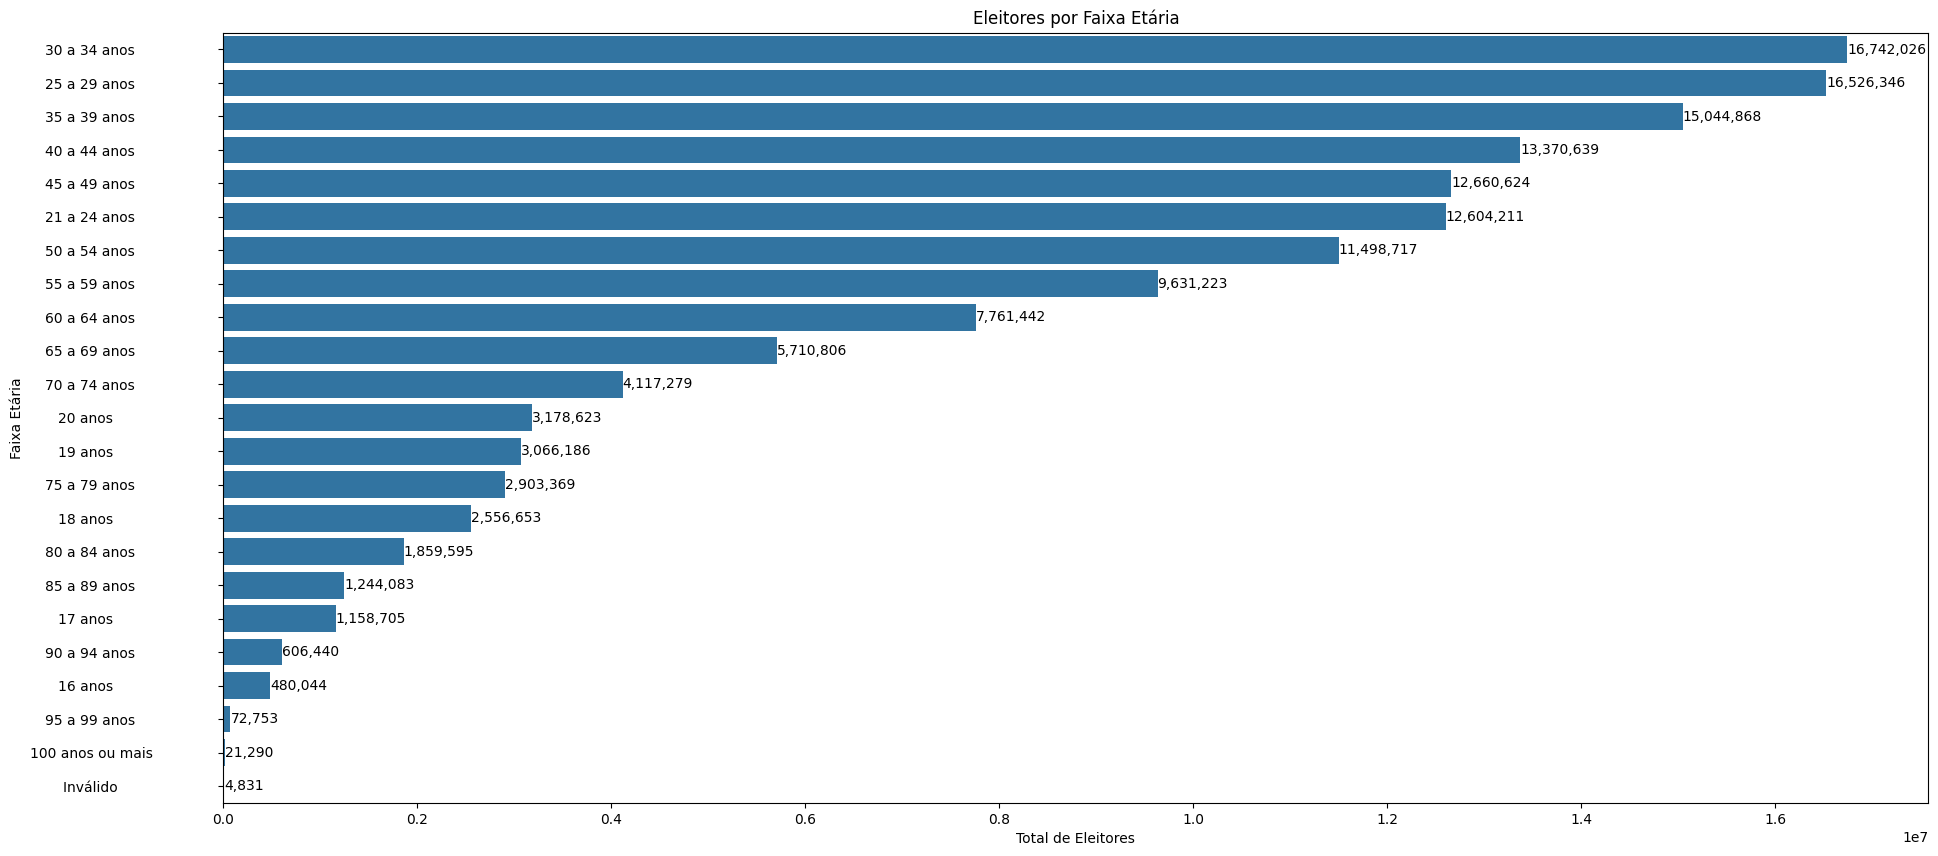

In [33]:
plt.figure(figsize=(22, 10))
sns.barplot(x='Total de Eleitores', y='Faixa Etária', data=faixa_etaria_df, orient='h')
plt.xlabel('Total de Eleitores')
plt.ylabel('Faixa Etária')
plt.title('Eleitores por Faixa Etária')

for i, v in enumerate(faixa_etaria_df['Total de Eleitores']):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Grau de Escolaridade dos Eleitores**

In [34]:
escolaridade_eleitores = df.groupby('DS_GRAU_ESCOLARIDADE')['QT_ELEITORES_PERFIL'].sum()
escolaridade_eleitores = escolaridade_eleitores.sort_values(ascending=False)

total_eleitores_escolaridade = escolaridade_eleitores.sum()
porcentagem_escolaridade = (escolaridade_eleitores / total_eleitores_escolaridade) * 100

tabela_escolaridade = pd.DataFrame({
    'Total de Eleitores': escolaridade_eleitores,
    'Porcentagem': porcentagem_escolaridade.round(2)
})

tabela_escolaridade['Porcentagem'] = tabela_escolaridade['Porcentagem'].astype(str) + '%'


**Tabela**

In [35]:
tabela_escolaridade

,Total de Eleitores,Porcentagem
DS_GRAU_ESCOLARIDADE,,
ENSINO FUNDAMENTAL INCOMPLETO,43149382,30.21%
ENSINO MÉDIO INCOMPLETO,27510767,19.26%
ENSINO MÉDIO COMPLETO,23838919,16.69%
LÊ E ESCREVE,17252070,12.08%
ENSINO FUNDAMENTAL COMPLETO,10300504,7.21%
SUPERIOR COMPLETO,8038741,5.63%
ANALFABETO,7389541,5.17%
SUPERIOR INCOMPLETO,5225357,3.66%
NÃO INFORMADO,115472,0.08%


**Gráfico**

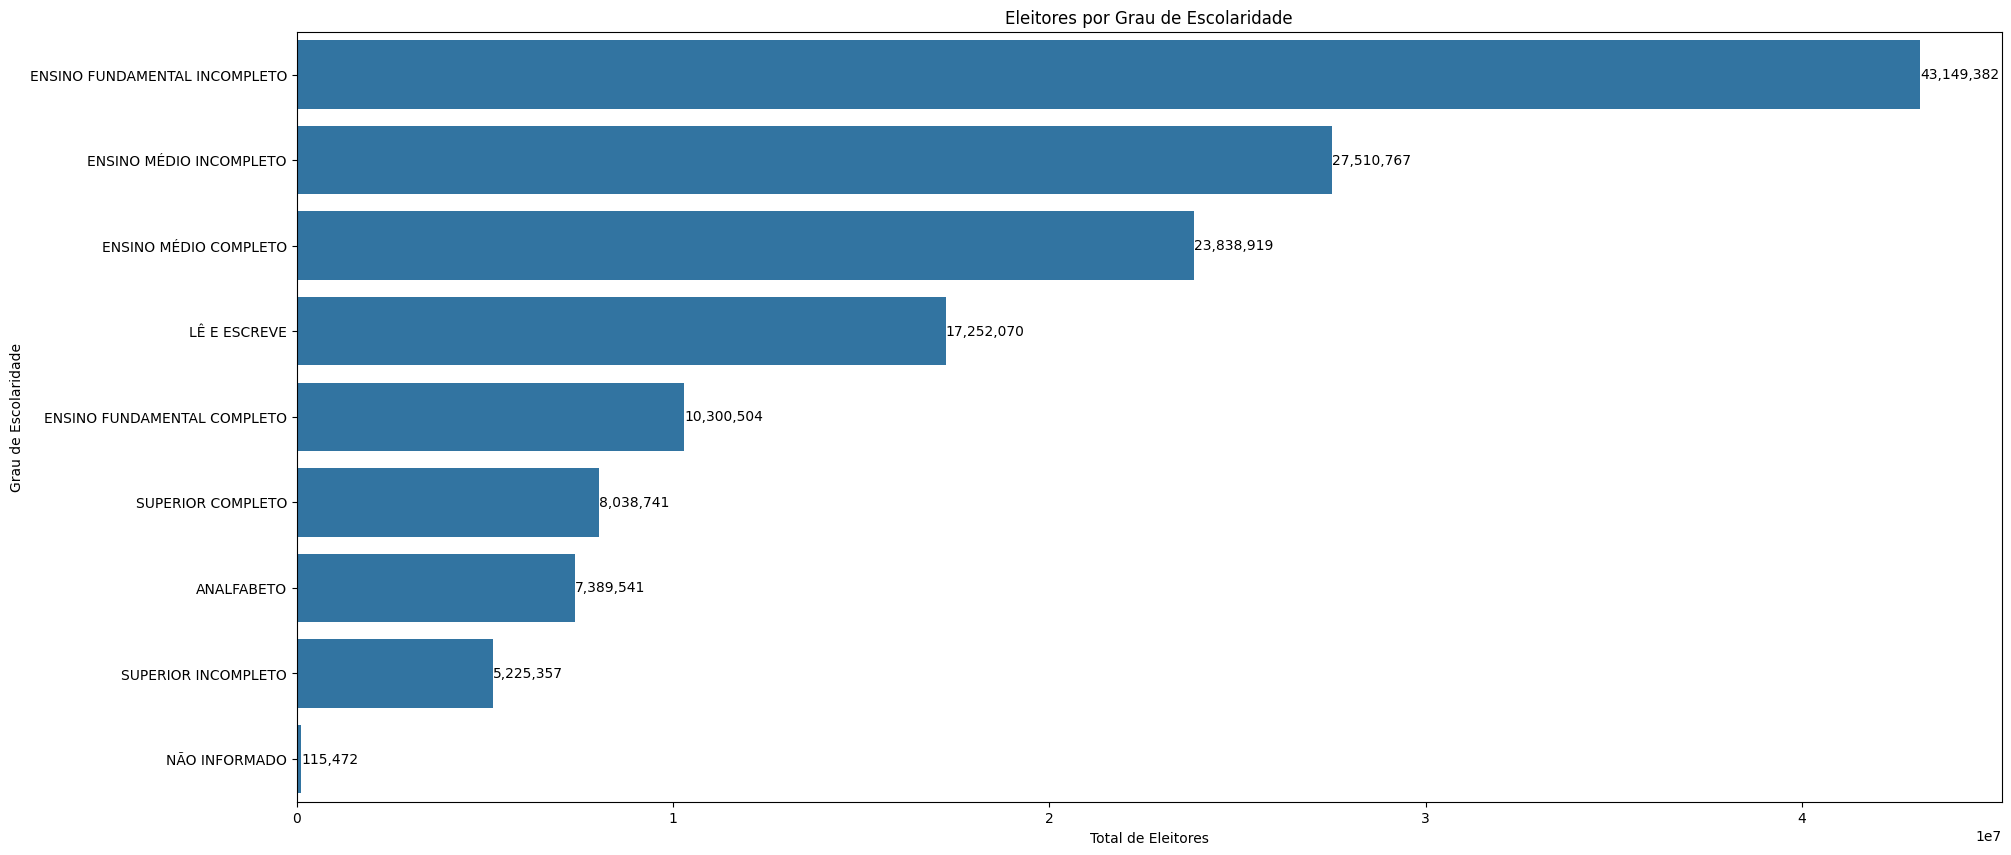

In [36]:
plt.figure(figsize=(22, 10))
sns.barplot(x='Total de Eleitores', y=tabela_escolaridade.index, data=tabela_escolaridade, orient='h')
plt.xlabel('Total de Eleitores')
plt.ylabel('Grau de Escolaridade')
plt.title('Eleitores por Grau de Escolaridade')

for i, v in enumerate(tabela_escolaridade['Total de Eleitores']):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()
